In [2]:
import shapefile
from pyproj import Proj, transform
#from mpl_toolkits.basemap import Basemap # use for map, but I can't get it to install
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# data from https://city.milwaukee.gov/DownloadMapData3497.htm
# it is encoded in NAD27 in zone 4803 (Wisconsin South)

In [3]:
#f = open('ald2012.shp', 'rb')
#sf = shapefile.Reader(shp=f)
sf = shapefile.Reader('ald2016/alderman')
#sf = shapefile.Reader('hoods/neighborhood')
#sf = shapefile.Reader('poldist/poldist')
#sf = shapefile.Reader('wards/ward')

In [4]:
# converter for coordinates
inProj = Proj(init='EPSG:32054', preserve_units=True) # NAD27 Wisconsin South
outProj = Proj(proj='latlong', datum='WGS84', ellps='WGS84') # Latitude and Longitude

In [5]:
df = pd.read_csv('../geocoding_data/logged-calls-09-12-18.csv', header=0, index_col=0, parse_dates=['Date/Time'])
df.head()

,ID,Call Number,Date/Time,Location,Police District,Nature of Call,Status,Cleaned_Location,Coordinates,Error_Logging
0,182551269-Service in Progress,182551269,2018-09-12 12:49:30,"3626 W FOND DU LAC AV,MKE",7,COURT DUTY,Service in Progress,"3626 W FOND DU LAC AV,MILWAUKEE","{'lat': 43.077239, 'lng': -87.959228}",NaN
1,182551267-Service in Progress,182551267,2018-09-12 12:48:57,"749 W STATE ST,MKE",1,SPECIAL ASSIGN,Service in Progress,"749 W STATE ST,MILWAUKEE","{'lat': 43.042662, 'lng': -87.920879}",NaN
2,182551191-Advised/Referral,182551191,2018-09-12 12:48:55,"7009 W SILVER SPRING DR,MKE",4,TRBL W/SUBJ,Advised/Referral,"7009 W SILVER SPRING DR,MILWAUKEE","{'lat': 43.119098, 'lng': -87.999648}",NaN
3,182551256-Service in Progress,182551256,2018-09-12 12:48:12,"N 15TH ST / W HADLEY ST,MKE",5,TRBL W/SUBJ,Service in Progress,"N 15TH ST & W HADLEY ST,MILWAUKEE","{'lat': 43.069547, 'lng': -87.931272}",NaN
4,182551265-Assignment Completed,182551265,2018-09-12 12:48:04,"5636 N 79TH ST,MKE",4,VACANT HOUSE CHK,Assignment Completed,"5636 N 79TH ST,MILWAUKEE","{'lat': 43.120495, 'lng': -88.009319}",NaN


In [25]:
coords = df['Coordinates'].str.split(',', 1, expand=True)
coords['lat'] = coords[0].str.replace('{\'lat\': ', '')
coords['long'] = coords[1].str.replace('\'lng\': ', '')
coords['long'] = coords['long'].str.replace('}', '')
coords = coords[['lat', 'long']]
coords = coords.dropna()
coords.head()

,lat,long
0,43.077239,-87.959228
1,43.042662,-87.920879
2,43.119098,-87.999648
3,43.069547,-87.931272
4,43.120495,-88.009319


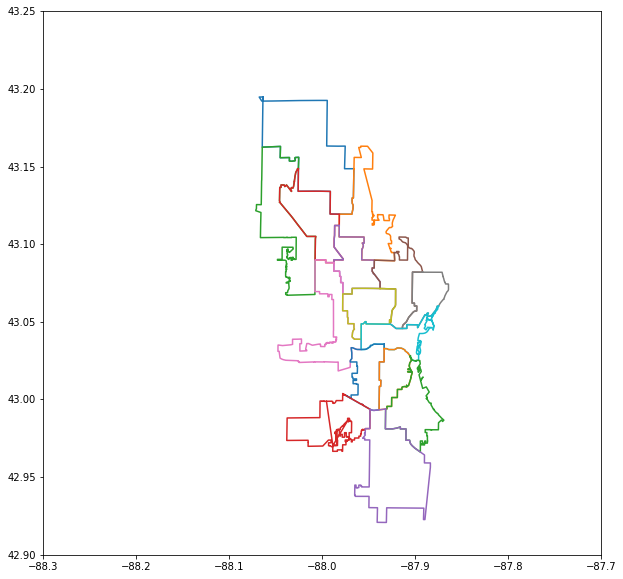

In [30]:
# initialize plot size
plt.figure(figsize=(10,10))

# loop through shapes
for i,dist in enumerate(sf.shapes()):
    xs = []
    ys = []
    
    # loop through points
    for point in dist.points:
        # parse points
        coords = ['%.3f' % coord for coord in point]
        # convert points
        x, y = transform(inProj, outProj, float(coords[0]), float(coords[1]))
        # add to list
        xs.append(x)
        ys.append(y)
        
    # plot shape
    plt.plot(xs, ys, '-')
    
#for index, row in coords.iterrows():
for row in coords:
    plt.plot(float(row[0]), float(row[1]), '*')
    
plt.xlim(-88.3,-87.7)
plt.ylim(42.9,43.25)
    
plt.show()